In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [2]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raviranjan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Loading dataset containing tweet body collected by get-tweets.py file
def load_data():
    data = pd.read_csv('ron.csv')
    return data

In [4]:
ron_tweets = load_data()
ron_tweets.head()

,date,tweet_body
0,2022-12-12 14:26:19+00:00,"b'RT @ben_rosen: musk: we must stop the woke mind virus, i hate unions and trans people, we need..."
1,2022-12-12 14:26:12+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant..."
2,2022-12-12 14:26:06+00:00,b'RT @JHFonseca: # CASOS DE MIOCARDITE NA FL\xc3\x93RIDA AUMENTAM EM 86% ENTRE JOVENS DE 18 E 39...
3,2022-12-12 14:26:02+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant..."
4,2022-12-12 14:25:59+00:00,"b'RT @kylegriffin1: The man who shared disinformation about Paul Pelosi, allowed hate speech to ..."


In [5]:
print('Shape of Dataset:',ron_tweets.shape)
print('Columns of Dataset',ron_tweets.columns)

Shape of Dataset: (17992, 2)
Columns of Dataset Index(['date', 'tweet_body'], dtype='object')


In [6]:
ron_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17992 entries, 0 to 17991
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        17992 non-null  object
 1   tweet_body  17992 non-null  object
dtypes: object(2)
memory usage: 281.2+ KB


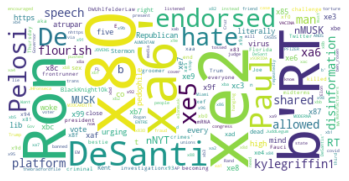

In [7]:
# Generating Word Cloud to see the keywords

tweet_main_body = " ".join(review for review in ron_tweets.tweet_body)

tweets_word_cloud = WordCloud(collocations = False, background_color = 'white').generate(tweet_main_body)

# Display the generated Word Cloud

plt.imshow(tweets_word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Data preprocessing 

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punctuation(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

ron_tweets['tweet_punct'] = ron_tweets['tweet_body'].apply(lambda x: remove_punctuation(x))
ron_tweets.head(10)

,date,tweet_body,tweet_punct
0,2022-12-12 14:26:19+00:00,"b'RT @ben_rosen: musk: we must stop the woke mind virus, i hate unions and trans people, we need...",bRT benrosen musk we must stop the woke mind virus i hate unions and trans people we need a repu...
1,2022-12-12 14:26:12+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...
2,2022-12-12 14:26:06+00:00,b'RT @JHFonseca: # CASOS DE MIOCARDITE NA FL\xc3\x93RIDA AUMENTAM EM 86% ENTRE JOVENS DE 18 E 39...,bRT JHFonseca CASOS DE MIOCARDITE NA FLxcxRIDA AUMENTAM EM ENTRE JOVENS DE E ANOS APxcxS A V...
3,2022-12-12 14:26:02+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...
4,2022-12-12 14:25:59+00:00,"b'RT @kylegriffin1: The man who shared disinformation about Paul Pelosi, allowed hate speech to ...",bRT kylegriffin The man who shared disinformation about Paul Pelosi allowed hate speech to flour...
5,2022-12-12 14:25:57+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...
6,2022-12-12 14:25:53+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...
7,2022-12-12 14:25:49+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...
8,2022-12-12 14:25:47+00:00,"b""RT @atrupar: MUSK: libs have the woke mind virus\nNYT ...\nMUSK: I'm literally urging you to v...",bRT atrupar MUSK libs have the woke mind virusnNYT nMUSK Im literally urging you to vote Republi...
9,2022-12-12 14:25:43+00:00,"b'RT @kylegriffin1: The man who shared disinformation about Paul Pelosi, allowed hate speech to ...",bRT kylegriffin The man who shared disinformation about Paul Pelosi allowed hate speech to flour...


In [10]:
#Tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

ron_tweets['tweet_tokenized'] = ron_tweets['tweet_punct'].apply(lambda x: tokenization(x.lower()))
ron_tweets.head()

,date,tweet_body,tweet_punct,tweet_tokenized
0,2022-12-12 14:26:19+00:00,"b'RT @ben_rosen: musk: we must stop the woke mind virus, i hate unions and trans people, we need...",bRT benrosen musk we must stop the woke mind virus i hate unions and trans people we need a repu...,"[brt, benrosen, musk, we, must, stop, the, woke, mind, virus, i, hate, unions, and, trans, peopl..."
1,2022-12-12 14:26:12+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...,"[brt, kylegriffin, a, miami, judge, has, tossed, out, another, voter, fraud, case, brought, by, ..."
2,2022-12-12 14:26:06+00:00,b'RT @JHFonseca: # CASOS DE MIOCARDITE NA FL\xc3\x93RIDA AUMENTAM EM 86% ENTRE JOVENS DE 18 E 39...,bRT JHFonseca CASOS DE MIOCARDITE NA FLxcxRIDA AUMENTAM EM ENTRE JOVENS DE E ANOS APxcxS A V...,"[brt, jhfonseca, casos, de, miocardite, na, flxcxrida, aumentam, em, entre, jovens, de, e, anos,..."
3,2022-12-12 14:26:02+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...,"[brt, kylegriffin, a, miami, judge, has, tossed, out, another, voter, fraud, case, brought, by, ..."
4,2022-12-12 14:25:59+00:00,"b'RT @kylegriffin1: The man who shared disinformation about Paul Pelosi, allowed hate speech to ...",bRT kylegriffin The man who shared disinformation about Paul Pelosi allowed hate speech to flour...,"[brt, kylegriffin, the, man, who, shared, disinformation, about, paul, pelosi, allowed, hate, sp..."


Removing stop words 

In [11]:
stopword = nltk.corpus.stopwords.words('english')

In [12]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
ron_tweets['tweet_nonstop'] = ron_tweets['tweet_tokenized'].apply(lambda x: remove_stopwords(x))
ron_tweets.head()

,date,tweet_body,tweet_punct,tweet_tokenized,tweet_nonstop
0,2022-12-12 14:26:19+00:00,"b'RT @ben_rosen: musk: we must stop the woke mind virus, i hate unions and trans people, we need...",bRT benrosen musk we must stop the woke mind virus i hate unions and trans people we need a repu...,"[brt, benrosen, musk, we, must, stop, the, woke, mind, virus, i, hate, unions, and, trans, peopl...","[brt, benrosen, musk, must, stop, woke, mind, virus, hate, unions, trans, people, need, republic..."
1,2022-12-12 14:26:12+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...,"[brt, kylegriffin, a, miami, judge, has, tossed, out, another, voter, fraud, case, brought, by, ...","[brt, kylegriffin, miami, judge, tossed, another, voter, fraud, case, brought, ron, desantis, el..."
2,2022-12-12 14:26:06+00:00,b'RT @JHFonseca: # CASOS DE MIOCARDITE NA FL\xc3\x93RIDA AUMENTAM EM 86% ENTRE JOVENS DE 18 E 39...,bRT JHFonseca CASOS DE MIOCARDITE NA FLxcxRIDA AUMENTAM EM ENTRE JOVENS DE E ANOS APxcxS A V...,"[brt, jhfonseca, casos, de, miocardite, na, flxcxrida, aumentam, em, entre, jovens, de, e, anos,...","[brt, jhfonseca, casos, de, miocardite, na, flxcxrida, aumentam, em, entre, jovens, de, e, anos,..."
3,2022-12-12 14:26:02+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...,"[brt, kylegriffin, a, miami, judge, has, tossed, out, another, voter, fraud, case, brought, by, ...","[brt, kylegriffin, miami, judge, tossed, another, voter, fraud, case, brought, ron, desantis, el..."
4,2022-12-12 14:25:59+00:00,"b'RT @kylegriffin1: The man who shared disinformation about Paul Pelosi, allowed hate speech to ...",bRT kylegriffin The man who shared disinformation about Paul Pelosi allowed hate speech to flour...,"[brt, kylegriffin, the, man, who, shared, disinformation, about, paul, pelosi, allowed, hate, sp...","[brt, kylegriffin, man, shared, disinformation, paul, pelosi, allowed, hate, speech, flourish, p..."


Lammitization after stopwords

In [13]:
portStem = nltk.PorterStemmer()

def stemming(text):
    text = [portStem.stem(word) for word in text]
    return text

ron_tweets['tweet_stemmed'] = ron_tweets['tweet_nonstop'].apply(lambda x: stemming(x))
ron_tweets.head()

,date,tweet_body,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed
0,2022-12-12 14:26:19+00:00,"b'RT @ben_rosen: musk: we must stop the woke mind virus, i hate unions and trans people, we need...",bRT benrosen musk we must stop the woke mind virus i hate unions and trans people we need a repu...,"[brt, benrosen, musk, we, must, stop, the, woke, mind, virus, i, hate, unions, and, trans, peopl...","[brt, benrosen, musk, must, stop, woke, mind, virus, hate, unions, trans, people, need, republic...","[brt, benrosen, musk, must, stop, woke, mind, viru, hate, union, tran, peopl, need, republican, ..."
1,2022-12-12 14:26:12+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...,"[brt, kylegriffin, a, miami, judge, has, tossed, out, another, voter, fraud, case, brought, by, ...","[brt, kylegriffin, miami, judge, tossed, another, voter, fraud, case, brought, ron, desantis, el...","[brt, kylegriffin, miami, judg, toss, anoth, voter, fraud, case, brought, ron, desanti, elect, p..."
2,2022-12-12 14:26:06+00:00,b'RT @JHFonseca: # CASOS DE MIOCARDITE NA FL\xc3\x93RIDA AUMENTAM EM 86% ENTRE JOVENS DE 18 E 39...,bRT JHFonseca CASOS DE MIOCARDITE NA FLxcxRIDA AUMENTAM EM ENTRE JOVENS DE E ANOS APxcxS A V...,"[brt, jhfonseca, casos, de, miocardite, na, flxcxrida, aumentam, em, entre, jovens, de, e, anos,...","[brt, jhfonseca, casos, de, miocardite, na, flxcxrida, aumentam, em, entre, jovens, de, e, anos,...","[brt, jhfonseca, caso, de, miocardit, na, flxcxrida, aumentam, em, entr, joven, de, e, ano, apxc..."
3,2022-12-12 14:26:02+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...,"[brt, kylegriffin, a, miami, judge, has, tossed, out, another, voter, fraud, case, brought, by, ...","[brt, kylegriffin, miami, judge, tossed, another, voter, fraud, case, brought, ron, desantis, el...","[brt, kylegriffin, miami, judg, toss, anoth, voter, fraud, case, brought, ron, desanti, elect, p..."
4,2022-12-12 14:25:59+00:00,"b'RT @kylegriffin1: The man who shared disinformation about Paul Pelosi, allowed hate speech to ...",bRT kylegriffin The man who shared disinformation about Paul Pelosi allowed hate speech to flour...,"[brt, kylegriffin, the, man, who, shared, disinformation, about, paul, pelosi, allowed, hate, sp...","[brt, kylegriffin, man, shared, disinformation, paul, pelosi, allowed, hate, speech, flourish, p...","[brt, kylegriffin, man, share, disinform, paul, pelosi, allow, hate, speech, flourish, platform,..."


In [14]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

ron_tweets['tweet_lemmatized'] = ron_tweets['tweet_nonstop'].apply(lambda x: lemmatizer(x))
ron_tweets.head()

,date,tweet_body,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized
0,2022-12-12 14:26:19+00:00,"b'RT @ben_rosen: musk: we must stop the woke mind virus, i hate unions and trans people, we need...",bRT benrosen musk we must stop the woke mind virus i hate unions and trans people we need a repu...,"[brt, benrosen, musk, we, must, stop, the, woke, mind, virus, i, hate, unions, and, trans, peopl...","[brt, benrosen, musk, must, stop, woke, mind, virus, hate, unions, trans, people, need, republic...","[brt, benrosen, musk, must, stop, woke, mind, viru, hate, union, tran, peopl, need, republican, ...","[brt, benrosen, musk, must, stop, woke, mind, virus, hate, union, trans, people, need, republica..."
1,2022-12-12 14:26:12+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...,"[brt, kylegriffin, a, miami, judge, has, tossed, out, another, voter, fraud, case, brought, by, ...","[brt, kylegriffin, miami, judge, tossed, another, voter, fraud, case, brought, ron, desantis, el...","[brt, kylegriffin, miami, judg, toss, anoth, voter, fraud, case, brought, ron, desanti, elect, p...","[brt, kylegriffin, miami, judge, tossed, another, voter, fraud, case, brought, ron, desantis, el..."
2,2022-12-12 14:26:06+00:00,b'RT @JHFonseca: # CASOS DE MIOCARDITE NA FL\xc3\x93RIDA AUMENTAM EM 86% ENTRE JOVENS DE 18 E 39...,bRT JHFonseca CASOS DE MIOCARDITE NA FLxcxRIDA AUMENTAM EM ENTRE JOVENS DE E ANOS APxcxS A V...,"[brt, jhfonseca, casos, de, miocardite, na, flxcxrida, aumentam, em, entre, jovens, de, e, anos,...","[brt, jhfonseca, casos, de, miocardite, na, flxcxrida, aumentam, em, entre, jovens, de, e, anos,...","[brt, jhfonseca, caso, de, miocardit, na, flxcxrida, aumentam, em, entr, joven, de, e, ano, apxc...","[brt, jhfonseca, casos, de, miocardite, na, flxcxrida, aumentam, em, entre, jovens, de, e, ano, ..."
3,2022-12-12 14:26:02+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...,"[brt, kylegriffin, a, miami, judge, has, tossed, out, another, voter, fraud, case, brought, by, ...","[brt, kylegriffin, miami, judge, tossed, another, voter, fraud, case, brought, ron, desantis, el...","[brt, kylegriffin, miami, judg, toss, anoth, voter, fraud, case, brought, ron, desanti, elect, p...","[brt, kylegriffin, miami, judge, tossed, another, voter, fraud, case, brought, ron, desantis, el..."
4,2022-12-12 14:25:59+00:00,"b'RT @kylegriffin1: The man who shared disinformation about Paul Pelosi, allowed hate speech to ...",bRT kylegriffin The man who shared disinformation about Paul Pelosi allowed hate speech to flour...,"[brt, kylegriffin, the, man, who, shared, disinformation, about, paul, pelosi, allowed, hate, sp...","[brt, kylegriffin, man, shared, disinformation, paul, pelosi, allowed, hate, speech, flourish, p...","[brt, kylegriffin, man, share, disinform, paul, pelosi, allow, hate, speech, flourish, platform,...","[brt, kylegriffin, man, shared, disinformation, paul, pelosi, allowed, hate, speech, flourish, p..."


In [15]:
from textblob import TextBlob 

In [16]:
 #Creating a function to get the subjectivity
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Creating a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity

In [17]:
ron_tweets['polarity'] = ron_tweets.apply(lambda x: TextBlob(x['tweet_punct']).sentiment.polarity, axis=1)
ron_tweets['subjectivity'] = ron_tweets.apply(lambda x: TextBlob(x['tweet_punct']).sentiment.subjectivity, axis=1)

In [18]:
ron_tweets.head()

,date,tweet_body,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,polarity,subjectivity
0,2022-12-12 14:26:19+00:00,"b'RT @ben_rosen: musk: we must stop the woke mind virus, i hate unions and trans people, we need...",bRT benrosen musk we must stop the woke mind virus i hate unions and trans people we need a repu...,"[brt, benrosen, musk, we, must, stop, the, woke, mind, virus, i, hate, unions, and, trans, peopl...","[brt, benrosen, musk, must, stop, woke, mind, virus, hate, unions, trans, people, need, republic...","[brt, benrosen, musk, must, stop, woke, mind, viru, hate, union, tran, peopl, need, republican, ...","[brt, benrosen, musk, must, stop, woke, mind, virus, hate, union, trans, people, need, republica...",-0.8,0.9
1,2022-12-12 14:26:12+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...,"[brt, kylegriffin, a, miami, judge, has, tossed, out, another, voter, fraud, case, brought, by, ...","[brt, kylegriffin, miami, judge, tossed, another, voter, fraud, case, brought, ron, desantis, el...","[brt, kylegriffin, miami, judg, toss, anoth, voter, fraud, case, brought, ron, desanti, elect, p...","[brt, kylegriffin, miami, judge, tossed, another, voter, fraud, case, brought, ron, desantis, el...",0.0,0.0
2,2022-12-12 14:26:06+00:00,b'RT @JHFonseca: # CASOS DE MIOCARDITE NA FL\xc3\x93RIDA AUMENTAM EM 86% ENTRE JOVENS DE 18 E 39...,bRT JHFonseca CASOS DE MIOCARDITE NA FLxcxRIDA AUMENTAM EM ENTRE JOVENS DE E ANOS APxcxS A V...,"[brt, jhfonseca, casos, de, miocardite, na, flxcxrida, aumentam, em, entre, jovens, de, e, anos,...","[brt, jhfonseca, casos, de, miocardite, na, flxcxrida, aumentam, em, entre, jovens, de, e, anos,...","[brt, jhfonseca, caso, de, miocardit, na, flxcxrida, aumentam, em, entr, joven, de, e, ano, apxc...","[brt, jhfonseca, casos, de, miocardite, na, flxcxrida, aumentam, em, entre, jovens, de, e, ano, ...",0.0,0.0
3,2022-12-12 14:26:02+00:00,"b""RT @kylegriffin1: A Miami judge has tossed out *another voter fraud case brought by Ron DeSant...",bRT kylegriffin A Miami judge has tossed out another voter fraud case brought by Ron DeSantis el...,"[brt, kylegriffin, a, miami, judge, has, tossed, out, another, voter, fraud, case, brought, by, ...","[brt, kylegriffin, miami, judge, tossed, another, voter, fraud, case, brought, ron, desantis, el...","[brt, kylegriffin, miami, judg, toss, anoth, voter, fraud, case, brought, ron, desanti, elect, p...","[brt, kylegriffin, miami, judge, tossed, another, voter, fraud, case, brought, ron, desantis, el...",0.0,0.0
4,2022-12-12 14:25:59+00:00,"b'RT @kylegriffin1: The man who shared disinformation about Paul Pelosi, allowed hate speech to ...",bRT kylegriffin The man who shared disinformation about Paul Pelosi allowed hate speech to flour...,"[brt, kylegriffin, the, man, who, shared, disinformation, about, paul, pelosi, allowed, hate, sp...","[brt, kylegriffin, man, shared, disinformation, paul, pelosi, allowed, hate, speech, flourish, p...","[brt, kylegriffin, man, share, disinform, paul, pelosi, allow, hate, speech, flourish, platform,...","[brt, kylegriffin, man, shared, disinformation, paul, pelosi, allowed, hate, speech, flourish, p...",-0.8,0.9


In [19]:

n=ron_tweets['polarity']

m=pd.Series(n)

m

0       -0.800000
1        0.000000
2        0.000000
3        0.000000
4       -0.800000
           ...   
17987    0.178571
17988    0.178571
17989   -0.300000
17990    0.178571
17991    0.000000
Name: polarity, Length: 17992, dtype: float64

In [20]:
# Initialing variables, 'positive as pos', 'Negative as neg'and 'Neutral as neu'.

pos=0
neg=0
neu=0


for items in m:
    if items>0:
        #print("Positive")
        pos=pos+1
    elif items<0:
        #print("Negative")
        neg=neg+1
    else:
        #print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

3045 8247 6700


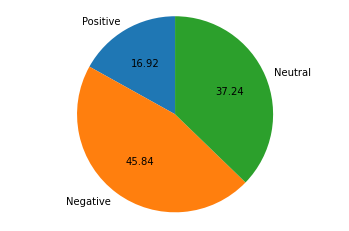

In [21]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

Similarity analysis using TDIDF Vectorization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
bow=CountVectorizer( min_df=2, max_features=1000)
bow.fit(ron_tweets['tweet_punct'])
bow_df=bow.transform(ron_tweets['tweet_punct']).toarray()

In [24]:
bow_df

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
import gensim
tokenize=ron_tweets['tweet_punct'].apply(lambda x: x.split())
w2vec_model=gensim.models.Word2Vec(tokenize,min_count = 1, window = 5, sg = 1)
w2vec_model.train(tokenize,total_examples= len(ron_tweets['tweet_punct']),epochs=20)

(4457365, 7406000)

4459622 data points of text is now converted to a 7406000-dimension vector each. 

In [26]:
print(w2vec_model)

Word2Vec<vocab=8805, vector_size=100, alpha=0.025>


In [27]:
from collections import Counter
Counter(" ".join(ron_tweets['tweet_punct']).split()).most_common(100)

[('bRT', 16626),
 ('Ron', 13568),
 ('to', 13328),
 ('and', 8112),
 ('who', 7229),
 ('on', 7021),
 ('Paul', 6417),
 ('endorsed', 6410),
 ('The', 6149),
 ('his', 6135),
 ('hate', 6075),
 ('the', 6024),
 ('about', 5939),
 ('kylegriffin', 5798),
 ('man', 5649),
 ('Pelosi', 5648),
 ('disinformation', 5638),
 ('speech', 5638),
 ('platform', 5633),
 ('flourish', 5631),
 ('shared', 5626),
 ('allowed', 5626),
 ('DeSantis', 5308),
 ('Dexexxa', 4965),
 ('nMUSK', 3468),
 ('for', 3332),
 ('was', 3170),
 ('vote', 2956),
 ('have', 2610),
 ('in', 2393),
 ('you', 2327),
 ('woke', 2238),
 ('mind', 2161),
 ('A', 2006),
 ('Im', 1764),
 ('literally', 1748),
 ('everyxexxa', 1737),
 ('atrupar', 1736),
 ('libs', 1735),
 ('a', 1734),
 ('MUSK', 1734),
 ('virusnNYT', 1734),
 ('urging', 1734),
 ('RepublicannNYT', 1734),
 ('highfives', 1734),
 ('Desantis', 1480),
 ('BlackKnightk', 1468),
 ('close', 1457),
 ('as', 1447),
 ('that', 1310),
 ('of', 1305),
 ('has', 1304),
 ('Stermon', 1303),
 ('Kent', 1246),
 ('up', 12

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raviranjan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

                Frequency
Word                     
ron                 14001
b'rt                12205
endorsed             6405
hate                 6078
@kylegriffin1:       5785
paul                 5715
man                  5652
disinformation       5637
pelosi,              5636
speech               5636
shared               5628
allowed              5628
flourish             5625
platform,            5623


<AxesSubplot:xlabel='Word'>

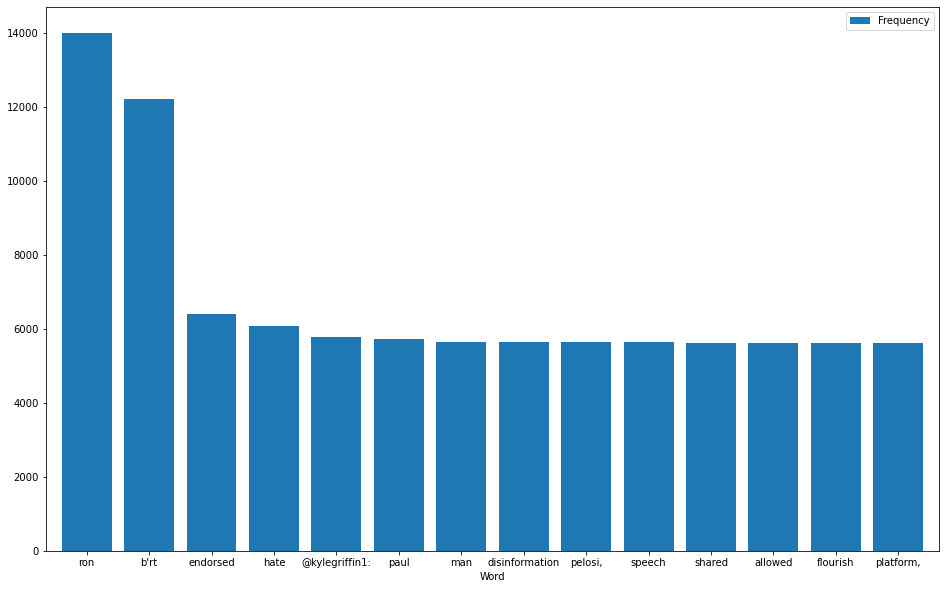

In [29]:


top_N = 14

df2 = pd.read_csv('ron.csv',
                 usecols=['tweet_body','tweet_body'])

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (df2.tweet_body
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)